In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [40]:
PSNR = np.load('Valid_10code/PSNR.npy')
PSNR_mono = np.load('Valid_10code/PSNR_mono.npy')
PSNR_non = np.load('Valid_10code/PSNR_non.npy')
TFR = np.load('Valid_10code/TFR.npy')
LR = np.load('Valid_10code/LR.npy')

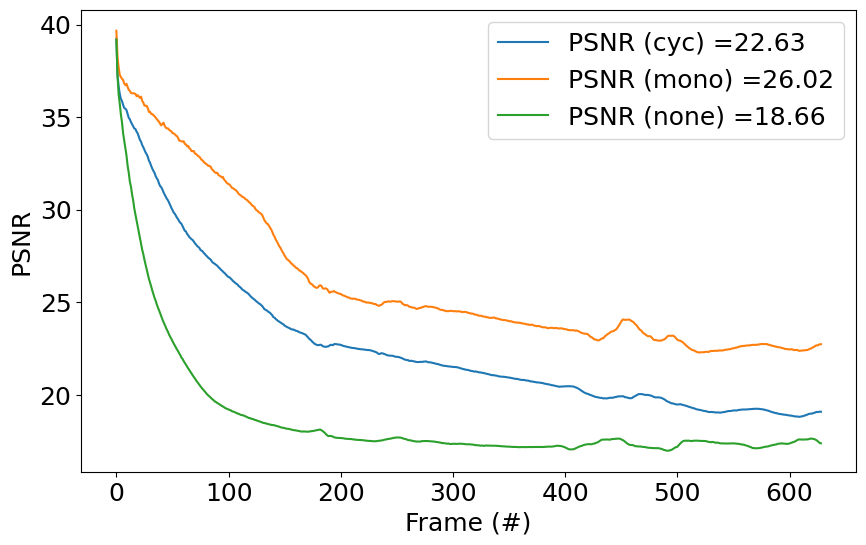

In [41]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(PSNR, label = 'PSNR (cyc) ={}'.format(round(PSNR.mean(),2)))
plt.plot(PSNR_mono, label = 'PSNR (mono) ={}'.format(round(PSNR_mono.mean(),2)))
plt.plot(PSNR_non, label = 'PSNR (none) ={}'.format(round(PSNR_non.mean(),2)))
plt.legend()
plt.xlabel('Frame (#)')
plt.ylabel('PSNR')
plt.show()

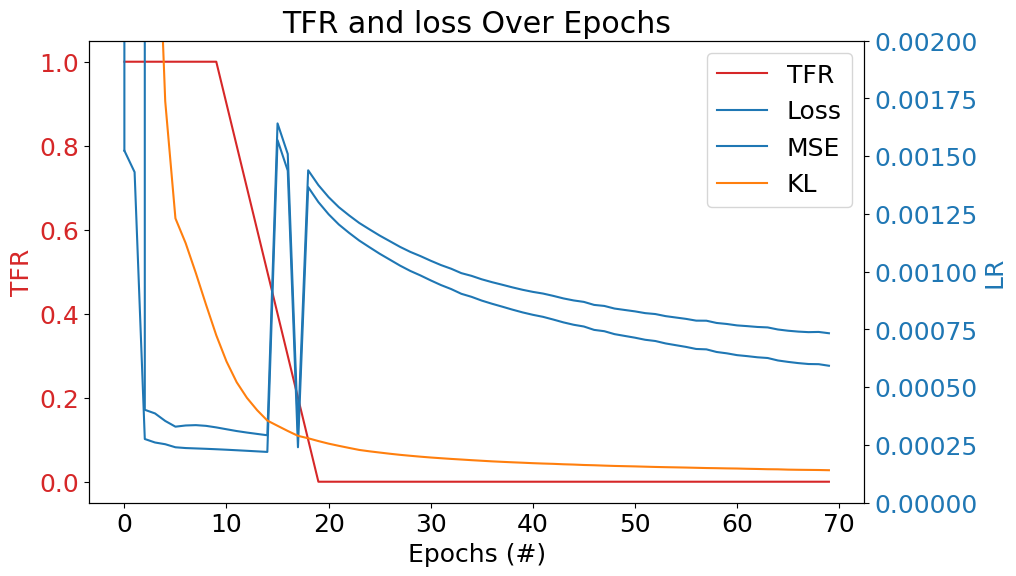

In [32]:
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 6)
color = 'tab:red'
fig, ax1 = plt.subplots()
ax1.set_xlabel('Epochs (#)')
ax1.set_ylabel('TFR', color=color)
ax1.plot(TFR, color=color, label='TFR')
ax1.tick_params(axis='y', labelcolor=color)
loss_Mono = result_hist_mono['loss'][:]
mse_Mono = result_hist_mono['mse'][:]
kl_Mono = result_hist_mono['KLD'][:]
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('LR', color=color)  
ax2.plot(loss_Mono, color=color, label='Loss')
ax2.plot(mse_Mono, label='MSE')
ax2.plot(kl_Mono, label='KL')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,0.002])
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('TFR and loss Over Epochs')
plt.show()

In [3]:
path_result = os.path.join('Result','training_process.npz')
result_hist = np.load(path_result)
path_result_mono = os.path.join('Result_Mono','training_process.npz')
result_hist_mono = np.load(path_result_mono)
path_result_none = os.path.join('Result_None','training_process.npz')
result_hist_none = np.load(path_result_none)

In [4]:
result_hist

NpzFile 'Result/training_process.npz' with keys: loss, mse, KLD, psnr

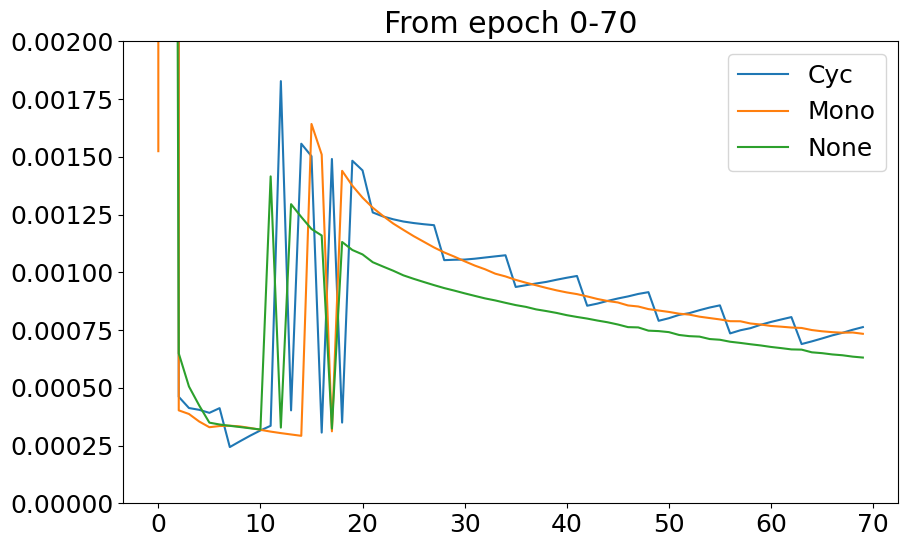

In [36]:
loss_Cyc = result_hist['loss'][:]
loss_Mono = result_hist_mono['loss'][:]
loss_None = result_hist_none['loss'][:]
x = list(range(0, 70))
plt.plot(x, loss_Cyc, label = 'Cyc')
plt.plot(x, loss_Mono, label = 'Mono')
plt.plot(x, loss_None, label = 'None')
plt.legend()
plt.title('From epoch 0-70')
plt.ylim([0, 0.002])
plt.show()

In [6]:
result_hist

NpzFile 'Result/training_process.npz' with keys: loss, mse, KLD, psnr

In [4]:
PSNR_Cyc = result_hist['psnr'][:,0]
PSNR_Mono = result_hist_mono['psnr'][:,0]
PSNR_None = result_hist_none['psnr'][:,0]

In [5]:
PSNR_Mono


array([18.90991831,  5.19760104, 16.87012903, 19.34220499, 19.9298754 ,
       20.89015306, 19.01198101, 22.224311  , 22.13442325, 21.7113686 ,
       22.25447725, 22.05501091, 21.83656455, 21.7174191 , 21.75290432,
       17.96376512, 18.50696714, 19.35657778, 18.73812045, 18.87985394,
       19.11166495, 19.70986272, 19.94137138, 20.35183484, 20.76221263,
       20.89549344, 20.77116448, 21.3554185 , 21.3066519 , 19.93347737,
       20.04596282, 21.38062465, 22.14150534, 25.19134861, 25.11085586,
       25.99742287, 22.47575323, 22.47204044, 22.51725511, 20.11287177,
       20.67221852, 20.16127884, 21.63703849, 22.97752067, 24.82722427,
       25.59814968, 23.14112453, 23.57163205, 22.78579448, 22.41728054,
       21.93399894, 21.7270855 , 23.11216865, 22.66914771, 22.62705285,
       23.53583189, 22.7846621 , 25.53243178, 23.081243  , 24.23546038,
       22.88234344, 22.92766409, 22.29436055, 26.27417487, 23.96370338,
       24.44054847, 22.37453222, 21.78909325, 21.94944756, 25.98

In [6]:
Argm_PSNR_Cyc = PSNR_Cyc.argmax()
Argm_PSNR_Mono = PSNR_Mono[:-1].argmax()
Argm_PSNR_None = PSNR_None.argmax()

In [7]:
print('PSNR (CYC): ep = {}, psnr = {:.3f}'.format(Argm_PSNR_Cyc, PSNR_Cyc[Argm_PSNR_Cyc]) )
print('PSNR (Mono): ep = {}, psnr = {:.3f}'.format(Argm_PSNR_Mono, PSNR_Mono[Argm_PSNR_Mono]) )
print('PSNR (None): ep = {}, psnr = {:.3f}'.format(Argm_PSNR_None, PSNR_None[Argm_PSNR_None]) )

PSNR (CYC): ep = 48, psnr = 24.690
PSNR (Mono): ep = 63, psnr = 26.274
PSNR (None): ep = 35, psnr = 23.758


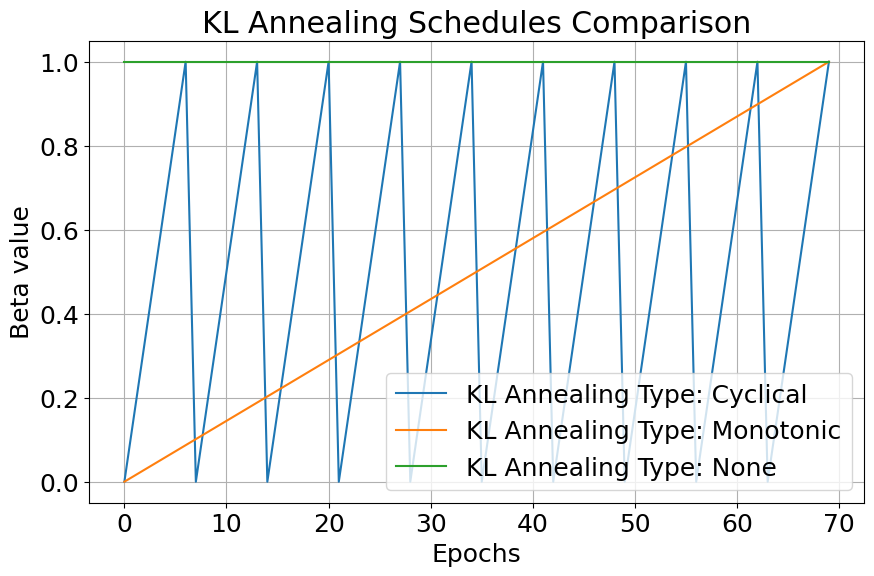

In [38]:
import numpy as np
import matplotlib.pyplot as plt

class KLAnnealing:
    def __init__(self, num_epochs, kl_anneal_type='None', kl_anneal_ratio=1, kl_anneal_cycle=1):
        self.num_epochs = num_epochs
        self.kl_anneal_type = kl_anneal_type
        self.kl_anneal_ratio = kl_anneal_ratio
        self.kl_anneal_cycle = kl_anneal_cycle
        self.schedule = self._create_schedule()

    def _create_schedule(self):
        if self.kl_anneal_type == 'None':
            return np.ones(self.num_epochs)
        elif self.kl_anneal_type == 'Monotonic':
            return self._frange_cycle_linear(self.num_epochs, n_cycle=1, ratio=self.kl_anneal_ratio)
        elif self.kl_anneal_type == 'Cyclical':
            return self._frange_cycle_linear(self.num_epochs, n_cycle=self.kl_anneal_cycle, ratio=self.kl_anneal_ratio)
        else:
            return np.ones(self.num_epochs)

    def _frange_cycle_linear(self, n_iter, start=0.0, stop=1.0, n_cycle=1, ratio=1):
        L = np.zeros(n_iter)
        period = n_iter // n_cycle
        step = (stop - start) / ((period - 1) * ratio)

        for c in range(n_cycle):
            v, i = start, 0
            while v <= stop and (int(i + c * period) < n_iter):
                L[int(i + c * period)] = v
                v += step
                i += 1
            # Fill the remainder of the cycle with the max value if not exactly fitting the period
            L[int(i + c * period):int((c + 1) * period)] = stop
        return L

# Parameters
num_epochs = 70
kl_anneal_types = ['Cyclical', 'Monotonic', 'None']
kl_anneal_ratio = 1
kl_anneal_cycle = 10

# Plotting
plt.figure(figsize=(10, 6))
for kl_type in kl_anneal_types:
    annealer = KLAnnealing(num_epochs, kl_type, kl_anneal_ratio, kl_anneal_cycle)
    plt.plot(annealer.schedule, label=f'KL Annealing Type: {kl_type}')

plt.title('KL Annealing Schedules Comparison')
plt.xlabel('Epochs')
plt.ylabel('Beta value')
plt.legend()
plt.grid(True)
plt.show()
